#   Edge circadian score 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Score = (all importance score for paths that traverse circadian genes)/(all importance scores for paths that traverse genes)

Circadian genes: amplitude >= 0.1, FDR < 0.05 (used in Ruben et al, STM 2018 paper)

In [2]:
# read in edge circadian score 
score_df = pd.read_csv('data/HumCircMed2018v2_mapped_edge_circa_scores.tsv', header = 0, sep = '\t')
score_df.head()

,drug.trtmnt,drug.trtmnt.DrugBankID,therapeutic.area,therapeutic.area.DOID,halflife.hrs,effect,Aorta,Artery Coronary,Artery Tibial,Colon,Esophagus,Fat SQ,Fat Visceral,Heart Atrial,Liver,Lung,Nerve Tibial,Pituitary,Thyroid,score_note
0,prednisone,DB00635,asthma,DOID:2841,2.50,more eff,0.0347,0.1573,0.0102,0.0451,0.1221,0.0,0.2394,0.2420,0.0865,0.0101,0.0303,0.008,0.1218,NaN
1,tulobuterol,DB12248,asthma,DOID:2841,NaN,more eff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,query drug not in hetionet
2,theophylline,DB00277,asthma,DOID:2841,8.00,more eff,0.0000,0.1984,0.0000,0.0000,0.2534,0.0,0.0000,0.0083,0.0000,0.0000,0.0000,0.000,0.1750,NaN
3,epinephrine,DB00668,asthma,DOID:2841,0.03,more eff,0.0596,0.3243,0.0000,0.0000,0.2331,0.0,0.2539,0.1050,0.4948,0.0000,0.0246,0.000,0.0246,NaN
4,orciprenaline,DB00816,asthma,DOID:2841,6.00,more eff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ruben et al data statistics

In [3]:
# some effect annotations contain other characters than 'more eff' or 'none'
score_df['effect'].value_counts()

more eff                        36
none                            17
more eff / less Aes              1
more eff/better tolerability     1
Name: effect, dtype: int64

In [4]:
score_df['effect'] = score_df.effect.str.replace('/better tolerability','')
score_df['effect'] = score_df.effect.str.replace(' / less Aes','')
score_df['effect'].value_counts()

more eff    38
none        17
Name: effect, dtype: int64

In [5]:
# some drug~disease pairs cannot be calculated due to various reasons
score_df['score_note'].value_counts()

query drug and disease not connected by genes in hetionet    14
query disease not in hetionet                                12
query drug not in hetionet                                    5
query drug and disease not connected in hetionet              2
Name: score_note, dtype: int64

### Score summary plot (too few points)

In [6]:
# 
tissues = ['Aorta','Artery Coronary','Artery Tibial','Colon','Esophagus','Fat SQ','Fat Visceral','Heart Atrial',
           'Liver','Lung','Nerve Tibial','Pituitary','Thyroid']
melt_df = pd.melt(score_df, id_vars = 'effect', value_vars = tissues)

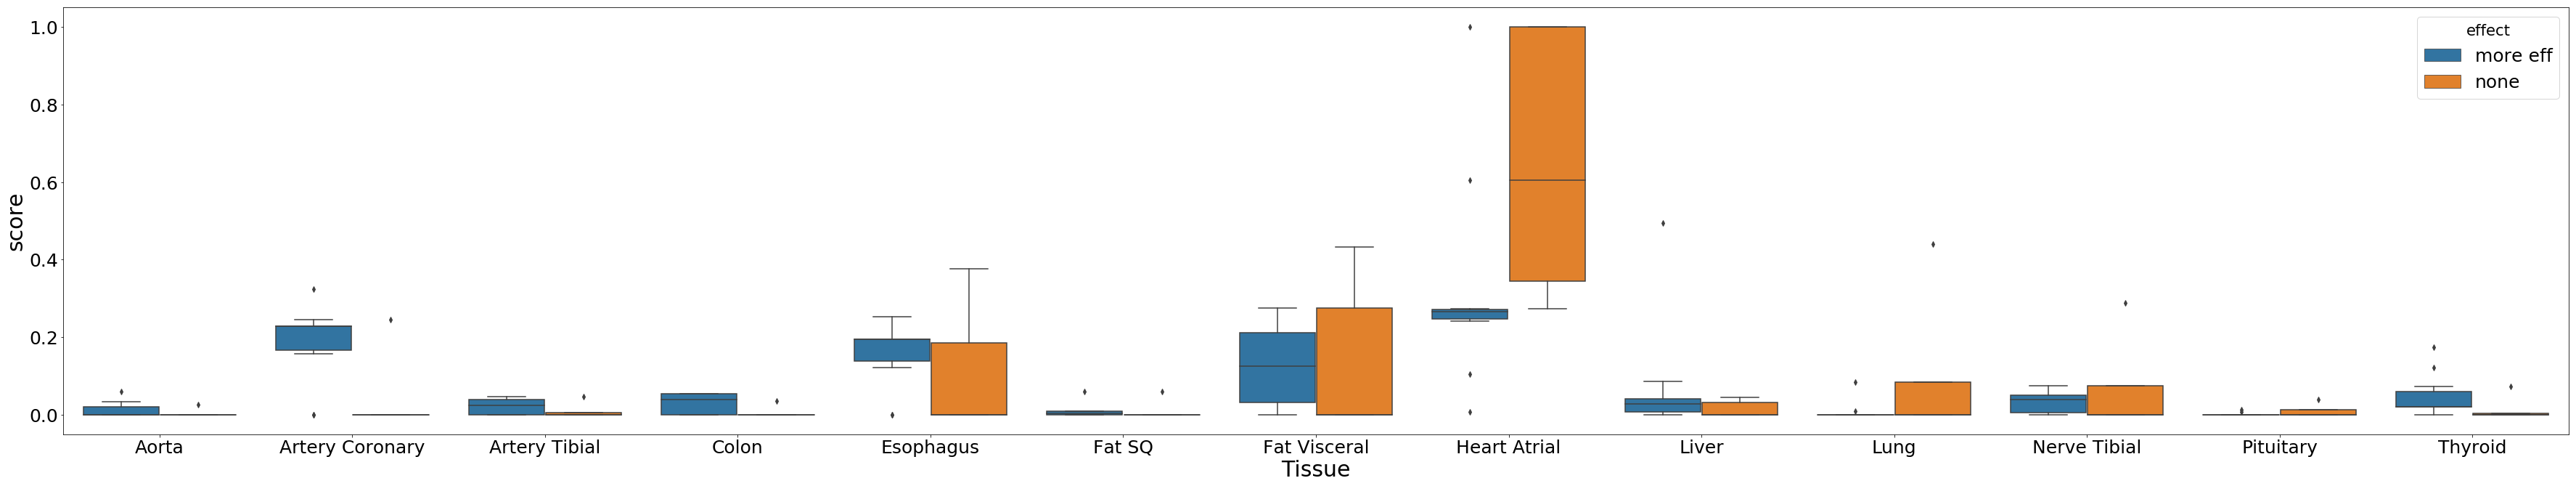

In [7]:
# plot 
plt.figure(figsize = (50,10))
sns.despine(left = True)
plt.rc('font', size = 30)
plt.rc('axes', titlesize = 25)
plt.rc('axes', labelsize = 25)
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
plt.rc('legend', fontsize = 25)
ax = sns.boxplot(x = 'variable', y = 'value', hue = 'effect', data = melt_df)
ax.set_xlabel('Tissue', size = 30)
ax.set_ylabel('score', size = 30)
plt.tight_layout()
plt.show()

### Score by diseasse

In [8]:
# asthma
score_df = score_df[~score_df.Aorta.isna()]
score_df[score_df['therapeutic.area'] == 'asthma']

,drug.trtmnt,drug.trtmnt.DrugBankID,therapeutic.area,therapeutic.area.DOID,halflife.hrs,effect,Aorta,Artery Coronary,Artery Tibial,Colon,Esophagus,Fat SQ,Fat Visceral,Heart Atrial,Liver,Lung,Nerve Tibial,Pituitary,Thyroid,score_note
0,prednisone,DB00635,asthma,DOID:2841,2.50,more eff,0.0347,0.1573,0.0102,0.0451,0.1221,0.0,0.2394,0.2420,0.0865,0.0101,0.0303,0.008,0.1218,NaN
2,theophylline,DB00277,asthma,DOID:2841,8.00,more eff,0.0000,0.1984,0.0000,0.0000,0.2534,0.0,0.0000,0.0083,0.0000,0.0000,0.0000,0.000,0.1750,NaN
3,epinephrine,DB00668,asthma,DOID:2841,0.03,more eff,0.0596,0.3243,0.0000,0.0000,0.2331,0.0,0.2539,0.1050,0.4948,0.0000,0.0246,0.000,0.0246,NaN


In [9]:
# Rheumatoid arthritis
score_df[score_df['therapeutic.area'] == 'Rheumatoid arthritis']

,drug.trtmnt,drug.trtmnt.DrugBankID,therapeutic.area,therapeutic.area.DOID,halflife.hrs,effect,Aorta,Artery Coronary,Artery Tibial,Colon,Esophagus,Fat SQ,Fat Visceral,Heart Atrial,Liver,Lung,Nerve Tibial,Pituitary,Thyroid,score_note
10,prednisone,DB00635,Rheumatoid arthritis,DOID:7148,2.5,more eff,0.0,0.229,0.0395,0.0536,0.1955,0.0087,0.1248,0.266,0.0276,0.0,0.0499,0.0,0.0208,NaN
12,prednisone,DB00635,Rheumatoid arthritis,DOID:7148,2.5,more eff,0.0,0.229,0.0395,0.0536,0.1955,0.0087,0.1248,0.266,0.0276,0.0,0.0499,0.0,0.0208,NaN
13,prednisone,DB00635,Rheumatoid arthritis,DOID:7148,2.5,more eff,0.0,0.229,0.0395,0.0536,0.1955,0.0087,0.1248,0.266,0.0276,0.0,0.0499,0.0,0.0208,NaN
14,prednisone,DB00635,Rheumatoid arthritis,DOID:7148,2.5,more eff,0.0,0.229,0.0395,0.0536,0.1955,0.0087,0.1248,0.266,0.0276,0.0,0.0499,0.0,0.0208,NaN


In [10]:
# hypertension
score_df[score_df['therapeutic.area'] == 'hypertension']

,drug.trtmnt,drug.trtmnt.DrugBankID,therapeutic.area,therapeutic.area.DOID,halflife.hrs,effect,Aorta,Artery Coronary,Artery Tibial,Colon,Esophagus,Fat SQ,Fat Visceral,Heart Atrial,Liver,Lung,Nerve Tibial,Pituitary,Thyroid,score_note
27,nitrendipine,DB01054,hypertension,DOID:10763,12.0,none,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
28,ramipril,DB00178,hypertension,DOID:10763,24.0,none,0.0267,0.2452,0.0466,0.0356,0.1857,0.0602,0.2747,0.2726,0.0454,0.0853,0.0741,0.0139,0.0723,NaN
29,amlodipine,DB00381,hypertension,DOID:10763,40.0,none,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
32,nitrendipine,DB01054,hypertension,DOID:10763,12.0,more eff,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
34,amlodipine,DB00381,hypertension,DOID:10763,40.0,none,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
36,amlodipine,DB00381,hypertension,DOID:10763,40.0,more eff,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
46,ramipril,DB00178,hypertension,DOID:10763,24.0,more eff,0.0267,0.2452,0.0466,0.0356,0.1857,0.0602,0.2747,0.2726,0.0454,0.0853,0.0741,0.0139,0.0723,NaN
